# Digit Recognition with MNIST dataset

## Introduction

This notebook demonstrates how to build a simple feedforward neural network (with one hidden layer) and train it from scratch with NumPy to recognize handwritten digit images. Based on the image inputs and their labels (supervised learning), the neural network will be trained to learn their features using forward propagation and backpropagation (reverse-mode differentiation). The final output of the network is a vector of 10 scores — one for each handwritten digit image. Furthermore, the accuracy regarding how good your model is at classifying the images on the test set will also be evaluated.

## Requirements

Some basic knowledge of Python, NumPy array manipulation, and linear algebra will be necessary to follow along this notebook. In addition, familiarity with main concepts of deep learning is also expected.

In addition to NumPy, the following Python standard modules will also be utilized for data loading and processing:

* `urllib` for URL handling
* `requests` for URL opening
* `gzip` for gzip file decompression
* `pickle` to work with the pickle file format
* `Matplotlib` for data visualization

#### 1. Load the MNIST dataset

In this section, the zipped MNIST dataset files will be downloaded which are originally stored in Yann LeCun’s website. Then, they will be transformed into 4 files of NumPy array type using built-in Python modules. Finally, the arrays will be splitted into training and test sets.

In [22]:
import os
import gzip
import requests
import numpy as np
import matplotlib.pyplot as plt

1.  Define a variable to store the training/test image/label names of the MNIST dataset in a list:

In [1]:
data_sources = {
    'training_images': 'train-images-idx3-ubyte.gz',    # 60,000 training images.
    'test_images': 't10k-images-idx3-ubyte.gz',         # 10,000 test images.
    'training_labels': 'train-labels-idx1-ubyte.gz',    # 60,000 training labels.
    'test_labels': 't10k-labels-idx1-ubyte.gz',         # 10,000 test labels.
}

2. Load the data. First check if the data is stored locally; if not, then download it.

In [16]:
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:10.0) Gecko/20100101 Firefox/10.0'
}

request_opts = {
    'headers': headers,
    'params': {'raw': 'true'},
}

data_dir = 'data'
os.makedirs(data_dir, exist_ok=True)

In [18]:
base_url = 'https://github.com/rossbar/numpy-tutorial-data-mirror/blob/main/'

for fname in data_sources.values():
    fpath = os.path.join(data_dir, fname)
    if not os.path.exists(fpath):
        print('Downloading file:', fname)
        response = requests.get(base_url + fname, stream=True, **request_opts)
        response.raise_for_status() # Ensures successful download
        
        with open(fpath, 'wb') as writer:
            for chunk in response.iter_content(chunk_size=128):
                writer.write(chunk)

3. Decompress the 4 files and create 4 ndarrays, saving them into a dictionary. Each original image is of size 28x28 and neural networks normally expect a 1D vector input; therefore, you also need to reshape the images by multiplying 28 by 28 (784).

In [19]:
mnist_dataset = {}

# images
for key in ('training_images', 'test_images'):
    with gzip.open(os.path.join(data_dir, data_sources[key]), 'rb') as reader:
        mnist_dataset[key] = np.frombuffer(reader.read(), np.uint8, offset=16).reshape(-1, 28 * 28)

# labels
for key in ('training_labels', 'test_labels'):
    with gzip.open(os.path.join(data_dir, data_sources[key]), 'rb') as reader:
        mnist_dataset[key] = np.frombuffer(reader.read(), np.uint8, offset=8)

4. Split the data into training and test sets using the standard notation of x for data and y for labels, calling the training and test set images x_train and x_test, and the labels y_train and y_test:

In [20]:
x_train, y_train, x_test, y_test = (
    mnist_dataset['training_images'],
    mnist_dataset['training_labels'],
    mnist_dataset['test_images'],
    mnist_dataset['test_labels'],
)

5. Verify that the shape of the image arrays is (60000, 784) and (10000, 784) for training and test sets, respectively, and the labels — (60000,) and (10000,):

In [21]:
print(f'The shape of training images: {x_train.shape} and training labels: {y_train.shape}')
print(f'The shape of test images: {x_test.shape} and test labels: {y_test.shape}')

The shape of training images: (60000, 784) and training labels: (60000,)
The shape of test images: (10000, 784) and test labels: (10000,)


6. Inspect some images using `matplotlib`

label of 60000th image 8


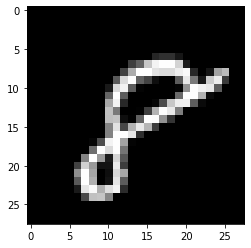

In [33]:
# Take 60000th image (indexed at 59999) from the training set, reshape from (784,)
# to (28, 28) to have a valid shape for displaying purposes.
mnist_image = x_train[59999, :].reshape(28, 28)

# Display the label of the 60,000th image (indexed at 59,999) from the training set.
print('label of 60000th image', y_train[59999])

# set the color mapping to grayscale to have a black background
plt.imshow(mnist_image, cmap='gray')
plt.show()

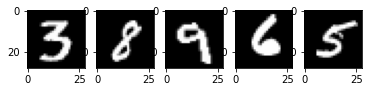

In [34]:
# Display 5 random images from the training set
num_examples = 5
seed = 147197952744 # used for reproducing the same indexes
rng = np.random.default_rng(seed)

fig, axes = plt.subplots(1, num_examples)
for sample, ax in zip(rng.choice(x_train, size=num_examples, replace=False), axes):
    ax.imshow(sample.reshape(28, 28), cmap='gray')